In [40]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import seaborn as sns

In [41]:
df = pd.read_csv('../../data/final_daily_returns_asset_classes.csv', index_col=0)
df.index = pd.to_datetime(df.index)

In [42]:
def load_pareto_fronts(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    
    all_runs = []
    for entry in data:
        pareto_front = []
        for solution in entry.get("solutions", []):
            # Ensure solution is a dictionary
            if isinstance(solution, dict):
                pareto_front.append({
                    "weights": solution.get("weights", []),
                    "expected_return": solution.get("expected_return", 0),
                    "SCR_risk": solution.get("SCR_risk", 0),
                    "risk_measure": solution.get("risk_measure", ""),
                    "distribution": solution.get("distribution", ""),
                    "period": solution.get("period", [])
                })
        all_runs.append(pareto_front)
    return all_runs

json_file_path = "../pareto_front_results.json"
pareto_fronts = load_pareto_fronts(json_file_path)

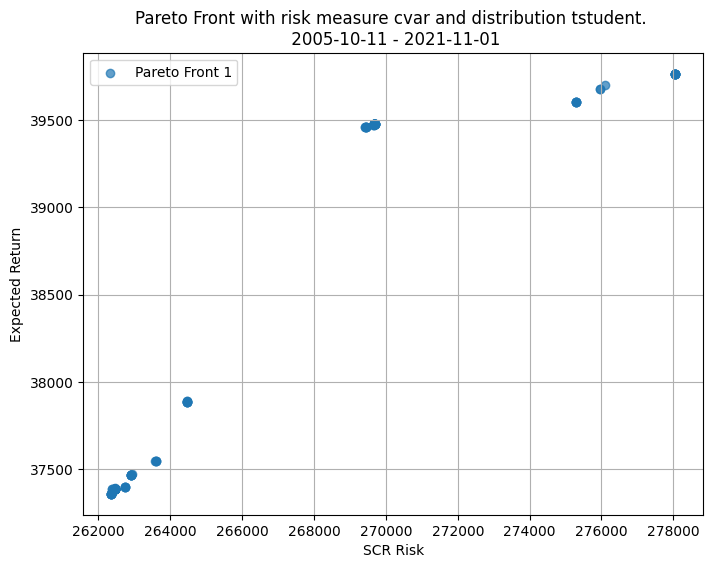

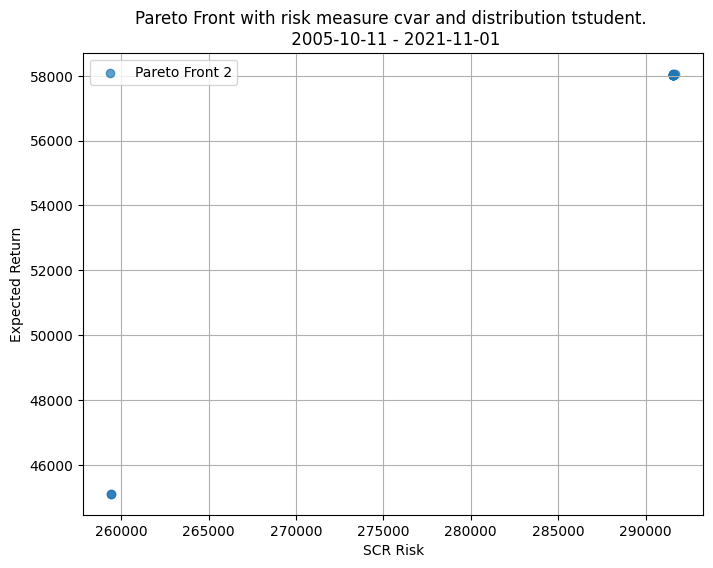

In [43]:
for i, pareto_front in enumerate(pareto_fronts, start=1):
    scr_risks = [solution["SCR_risk"] for solution in pareto_front]
    expected_returns = [solution["expected_return"] for solution in pareto_front]
    risk_measure = pareto_front[0]['risk_measure']
    distribution = pareto_front[0]['distribution']
    p1, p2 = pareto_front[0]['period'][0], pareto_front[0]['period'][1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(scr_risks, expected_returns, label=f'Pareto Front {i}', alpha=0.7)
    plt.title(f'Pareto Front with risk measure {risk_measure} and distribution {distribution}. \n 2005-10-11 - {p2}')
    plt.xlabel('SCR Risk')
    plt.ylabel('Expected Return')
    plt.legend()
    plt.grid(True)
    plt.show()